# Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Import dataset

In [2]:
df = pd.read_excel('../Data-gathering/Json/Final_Dataset.xlsx')
df = df.drop(['Index',
           'Date',
           'index',
           'Author name',
           'University',
           'country',
           'Google Scholar link of the university',
           'Google Scholar link of the author',
           'Qs uni world ranking',
           'Qs uni country ranking',
           'Date of the first publication (year)',
           'Date of the last publication (year)',
           "Author's positin in top 100 pages",
            ], axis=1)
cols = df.columns
main_df = df

# Minmax scaler

In [3]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(main_df)
min_maxed_df = pd.DataFrame(scaled, columns=[cols])

# Normalization

In [4]:
df_normalized = preprocessing.normalize(min_maxed_df)
dfcopy = df_normalized
df = pd.DataFrame(df_normalized, columns=[cols])

# PCA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


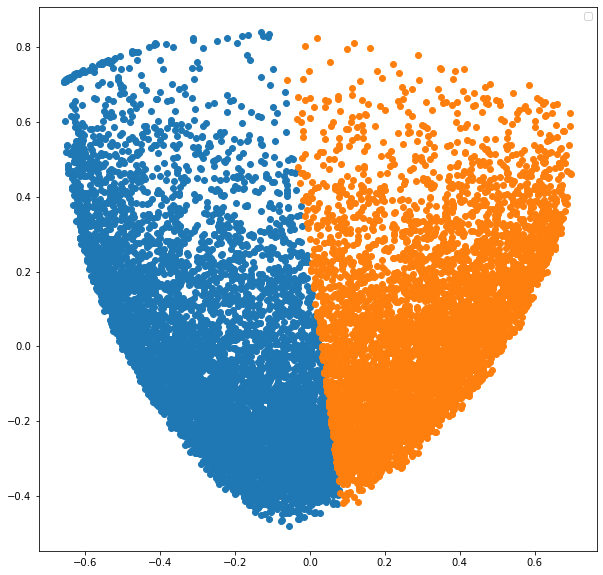

In [5]:
Newdf = pd.DataFrame(df, columns=[cols])
pca = PCA(2)
Newdf = pca.fit_transform(df)
data = Newdf.copy()
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

label = kmeans.fit_predict(data)
fig, ax = plt.subplots(figsize=(10, 10))

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] )
plt.legend()
plt.show()

# Trian model with 2 clusters

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

label = kmeans.fit_predict(df)

# Assign clusters to dataframe

In [7]:
main_df['Cluster'] = label
main_df = main_df.astype({"Cluster": int})

# Clusters histogram

<AxesSubplot:>

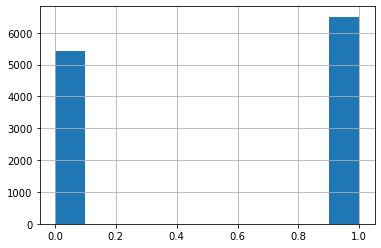

In [8]:
main_df['Cluster'].hist()

In [9]:
cluster_groups = main_df.groupby('Cluster')

# Histogram of each cluster

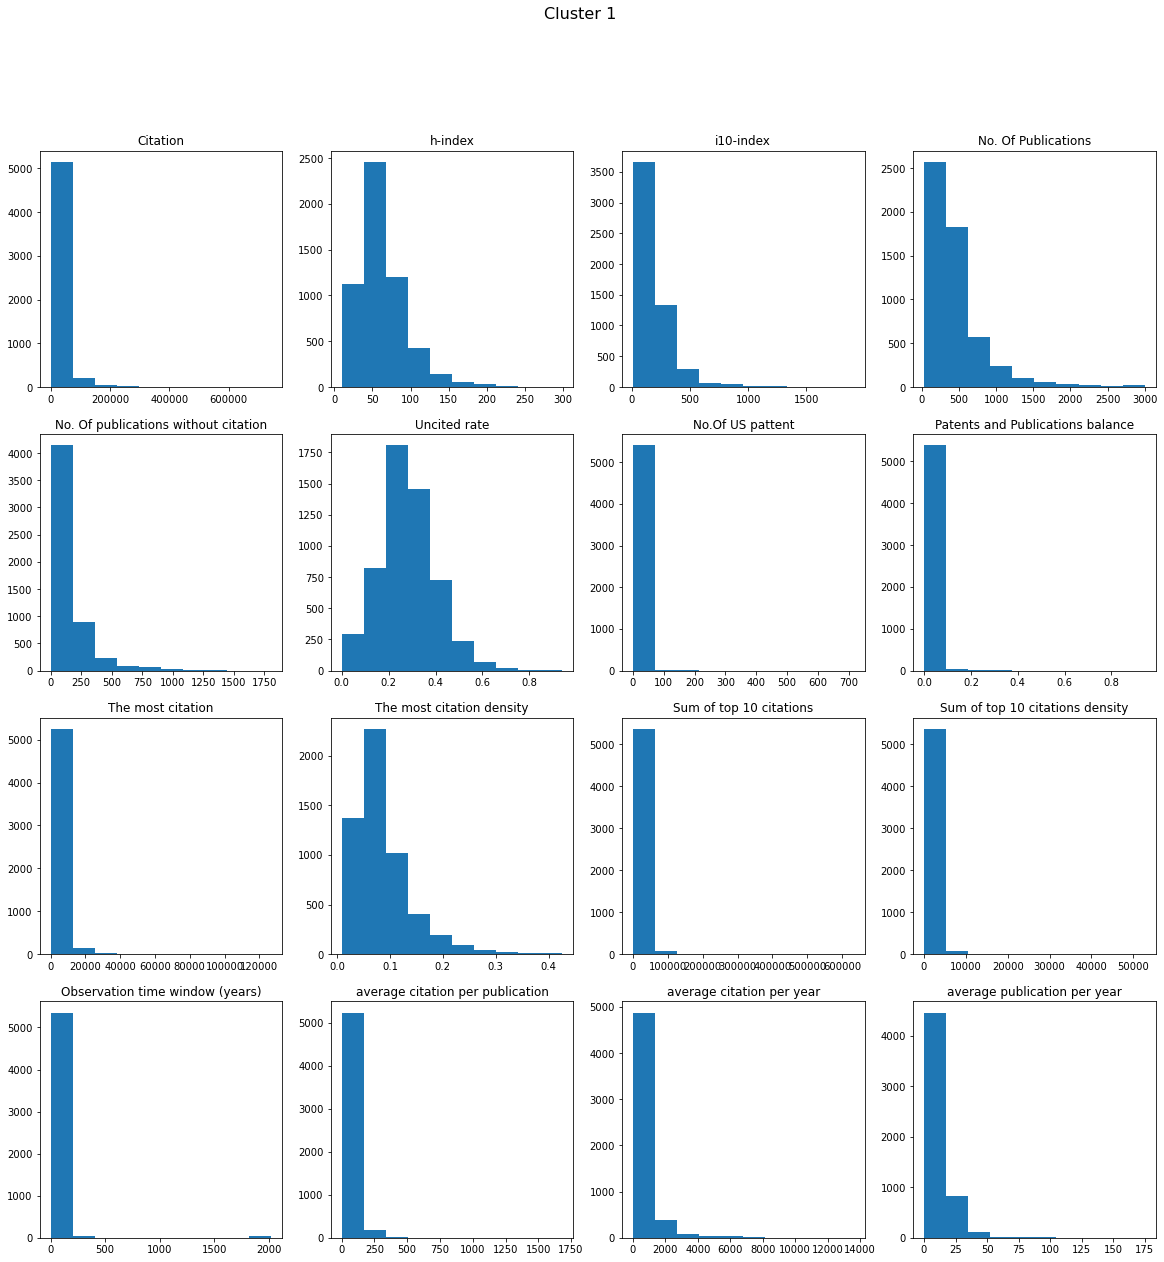

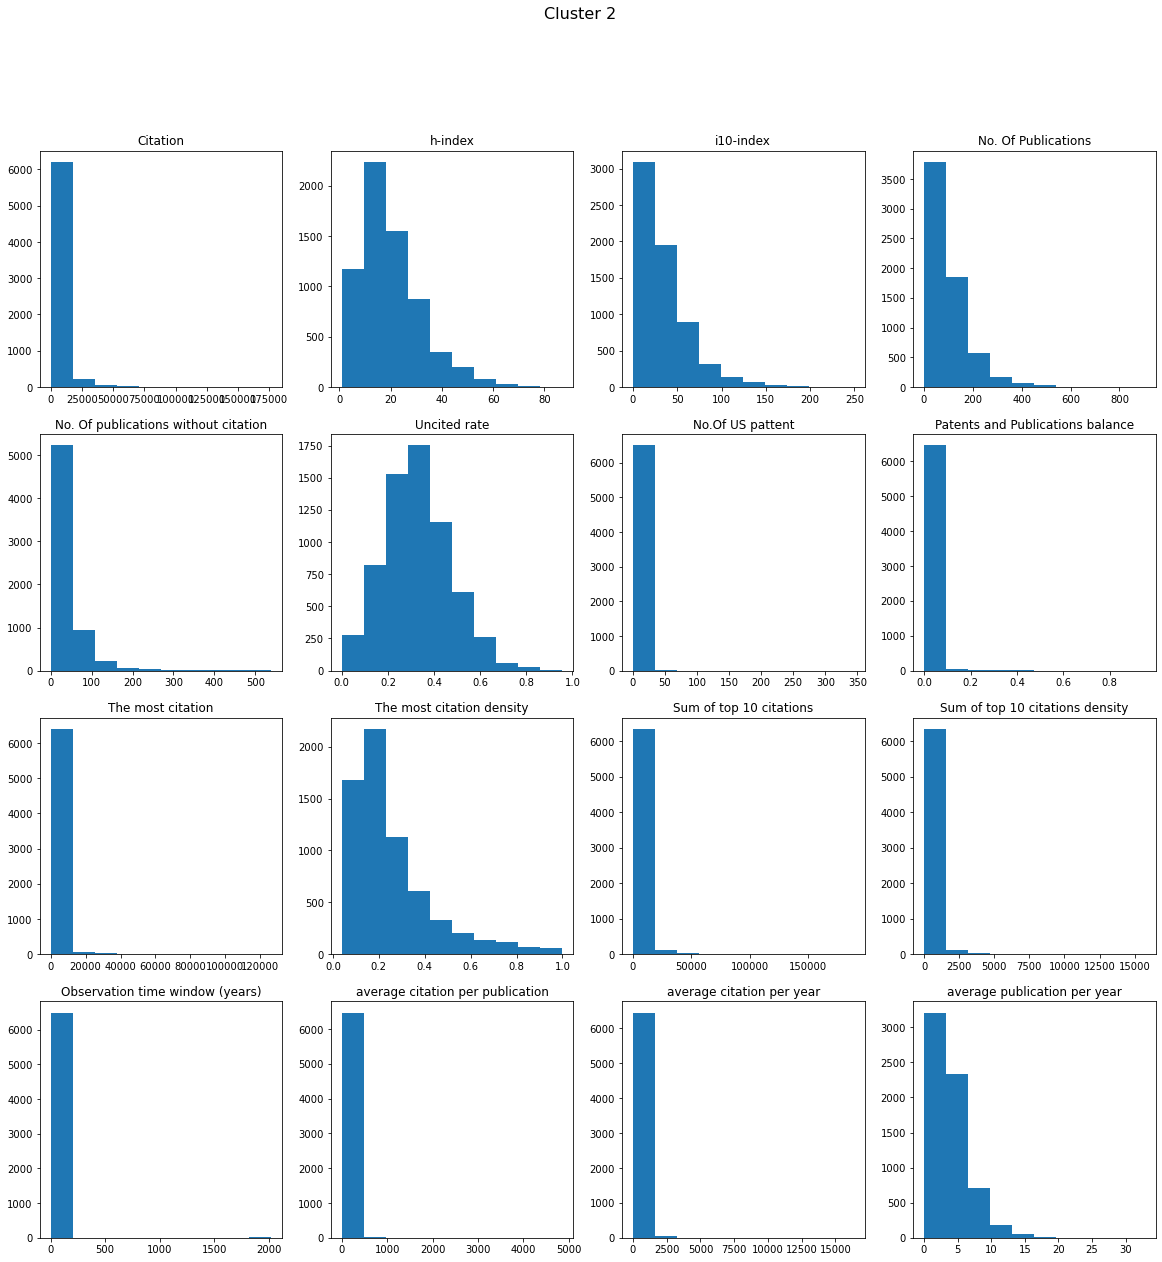

In [10]:
for cluster, _ in enumerate(cluster_groups):
  group = cluster_groups.get_group(cluster)
  fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
  fig.suptitle(f'Cluster {cluster + 1}', fontsize=16)
  i = 0
  j = 0
  for col in group.columns:
      if j == 4:
          i += 1
          j = 0
      if col == 'Cluster':
        pass
      else:
        ax[i, j].set(title = col)
        ax[i, j].hist(group[col])
      j += 1

# Data summary of each cluster

In [11]:
min_max_clusters = []
# from sklearn.utils.fixes import threadpool_limits
for cluster, _ in enumerate(cluster_groups):
  group = cluster_groups.get_group(cluster)
  statistical = []
  temp_min_max = {
      'cluster': cluster,
      'min': [],
      'max': [],
  }
  for col in group.columns:
      statistical_par = {
              'Minimum': round(group[col].min(),2),
              'Maximum': round(group[col].max(),2),
              'Median':  round(group[col].median(),2),
              'Mean':    round(group[col].mean(),2),
              'STD':     round(group[col].std(),2),
              'Variance':round(group[col].var(),2)
          }
      
      temp_min_max['max'].append({col:statistical_par['Maximum']})
      temp_min_max['min'].append({col:statistical_par['Minimum']})
      statistical.append(statistical_par)
  min_max_clusters.append(temp_min_max)
  temp = pd.DataFrame(
      statistical, 
      index = group.columns
  )
  print(f"\n\nCluster {cluster + 1}", end="\n")
  display(temp)



Cluster 1


,Minimum,Maximum,Median,Mean,STD,Variance
Citation,568.00,744199.00,13009.00,23211.03,32925.45,1.084085e+09
h-index,10.00,299.00,56.00,62.63,30.72,9.435700e+02
i10-index,12.00,1904.00,150.00,196.95,162.34,2.635351e+04
No. Of Publications,30.00,3000.00,343.00,449.97,375.53,1.410207e+05
No. Of publications without citation,0.00,1807.00,95.00,143.91,164.42,2.703448e+04
Uncited rate,0.00,0.94,0.27,0.28,0.12,1.000000e-02
No.Of US pattent,0.00,716.00,0.00,3.63,16.69,2.783900e+02
Patents and Publications balance,0.00,0.94,0.00,0.01,0.03,0.000000e+00
The most citation,22.00,126878.00,898.00,2455.20,5416.95,2.934330e+07
The most citation density,0.01,0.43,0.07,0.09,0.05,0.000000e+00




Cluster 2


,Minimum,Maximum,Median,Mean,STD,Variance
Citation,1.00,176539.00,1495.00,3983.55,8582.75,73663537.71
h-index,1.00,87.00,18.00,20.02,11.95,142.81
i10-index,0.00,249.00,26.00,33.98,29.73,883.92
No. Of Publications,1.00,903.00,76.00,99.55,84.84,7197.79
No. Of publications without citation,0.00,539.00,23.00,35.37,41.34,1709.36
Uncited rate,0.00,0.96,0.32,0.33,0.15,0.02
No.Of US pattent,0.00,344.00,0.00,0.40,4.67,21.82
Patents and Publications balance,0.00,0.95,0.00,0.00,0.02,0.00
The most citation,1.00,126317.00,249.00,1339.56,4484.28,20108722.86
The most citation density,0.04,1.00,0.20,0.26,0.18,0.03


# Find minimum and maximum in all clusters

In [12]:
max = {}
min = {}
max_cluster = {}
min_cluster = {}
for cluster in min_max_clusters:
  for item in cluster['max']:
    col, value = list(item.items())[0]
    if col != "Cluster":
      v = max.get(col, 0)
      if value > v:
        max[col] = value
        max_cluster[col] = cluster['cluster'] + 1
  for item in cluster['min']:
    col, value = list(item.items())[0]
    if col != "Cluster":
      v = min.get(col, 100000000)
      if value < v:
        min[col] = value
        min_cluster[col] = cluster['cluster'] + 1

In [13]:
from pprint import pprint
print('Max:', end="\n\n")
pprint(max_cluster, indent=2)

print('\n\nMin:', end="\n\n")
pprint(min_cluster, indent=2)

Max:

{ 'Citation': 1,
  'No. Of Publications': 1,
  'No. Of publications without citation': 1,
  'No.Of US pattent': 1,
  'Observation time window (years)': 1,
  'Patents and Publications balance': 2,
  'Sum of top 10 citations': 1,
  'Sum of top 10 citations density': 1,
  'The most citation': 1,
  'The most citation density': 2,
  'Uncited rate': 2,
  'average citation per publication': 2,
  'average citation per year': 2,
  'average publication per year': 1,
  'h-index': 1,
  'i10-index': 1}


Min:

{ 'Citation': 2,
  'No. Of Publications': 2,
  'No. Of publications without citation': 1,
  'No.Of US pattent': 1,
  'Observation time window (years)': 1,
  'Patents and Publications balance': 1,
  'Sum of top 10 citations': 2,
  'Sum of top 10 citations density': 2,
  'The most citation': 2,
  'The most citation density': 1,
  'Uncited rate': 1,
  'average citation per publication': 2,
  'average citation per year': 2,
  'average publication per year': 2,
  'h-index': 2,
  'i10-index':

# Creating codebook

In [31]:
kmeansInertias = []
kmeans = KMeans(init='k-means++', n_clusters=2, random_state=0, n_init=12) 
kmeans.fit(df)
clusterCenters = kmeans.cluster_centers_
kmeansInertias.append(kmeans.inertia_)
centroidsTable = pd.DataFrame(clusterCenters, columns=df.columns[:17], index = ['C'+str(i+1) for i in range(len(clusterCenters))])

display(centroidsTable)

,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year
C1,0.011530,0.162740,0.045175,0.077292,0.041417,0.748064,0.001190,0.008559,0.018803,0.519937,0.009648,0.009648,0.032025,0.019296,0.022492,0.056514
C2,0.057342,0.461189,0.213286,0.293567,0.141142,0.651847,0.008905,0.016268,0.033926,0.189932,0.025688,0.025688,0.052402,0.025950,0.078511,0.150212


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year
C1,0.011530,0.162740,0.045175,0.077292,0.041417,0.748064,0.001190,0.008559,0.018803,0.519937,0.009648,0.009648,0.032025,0.019296,0.022492,0.056514
C2,0.057342,0.461189,0.213286,0.293567,0.141142,0.651847,0.008905,0.016268,0.033926,0.189932,0.025688,0.025688,0.052402,0.025950,0.078511,0.150212


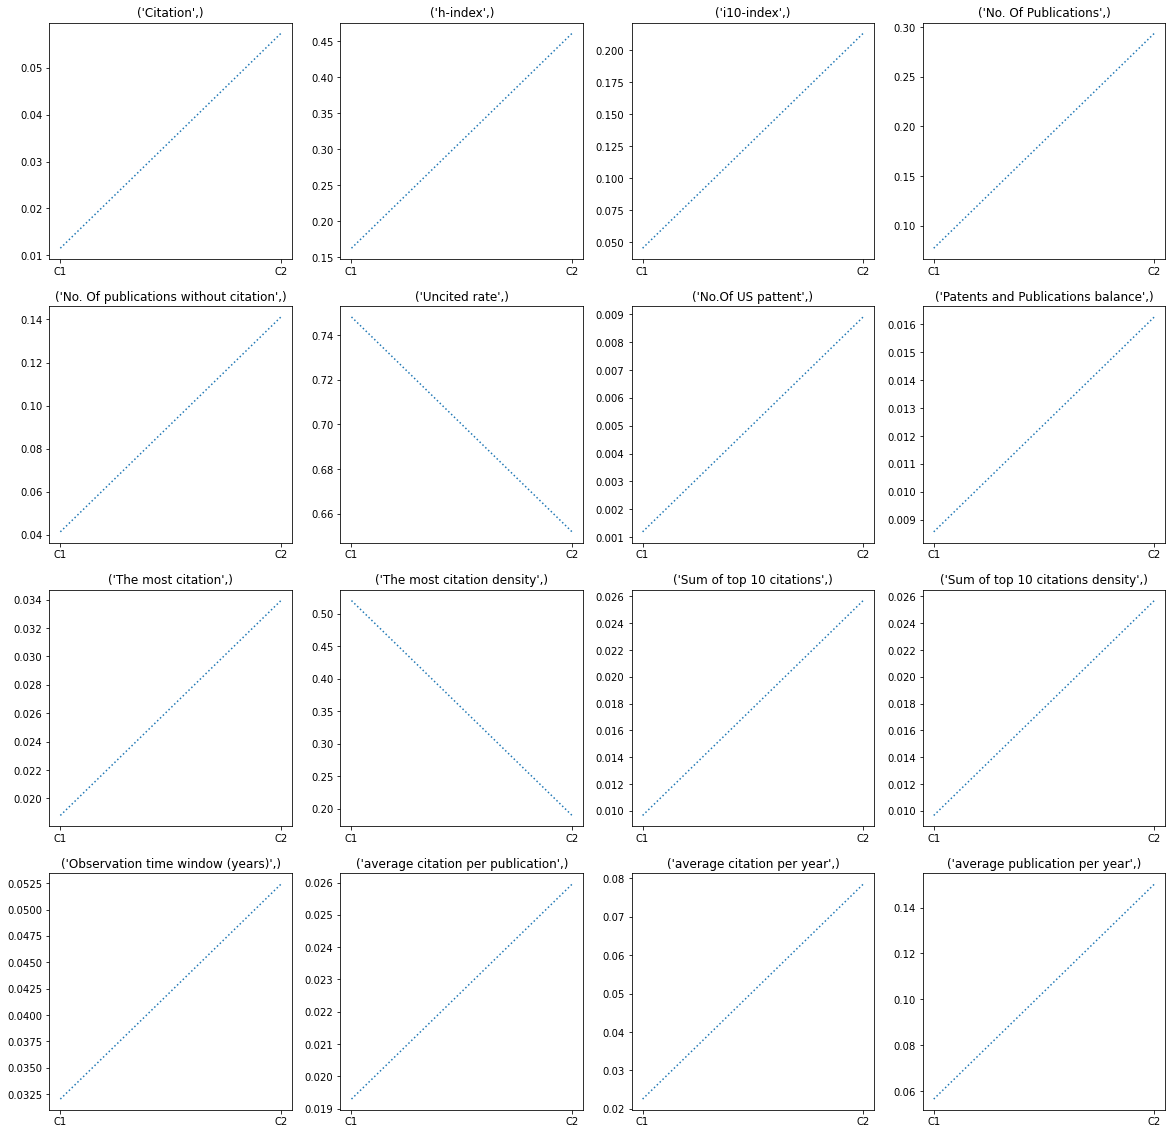

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
i = 0
j = 0
display(centroidsTable)
for col in centroidsTable.columns:
    if j == 4:
        i += 1
        j = 0
    ax[i, j].set(title = col)
    ax[i, j].plot(centroidsTable[col], linestyle = 'dotted')
    j += 1